In [81]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk, binary_dilation, binary_erosion
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.draw import circle_perimeter

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

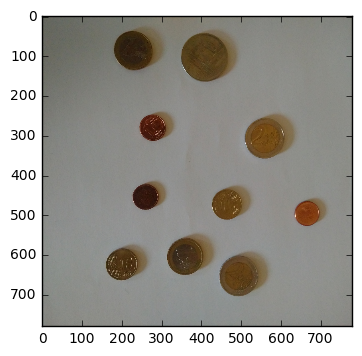

In [53]:
coins = plt.imread('images/coins.jpg')
coins = img_as_ubyte(coins)
coins_rgb = rescale(coins, 0.25)
coins_gray = rgb2gray(coins_rgb)
plt.imshow(coins_rgb)


Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

(780, 780)


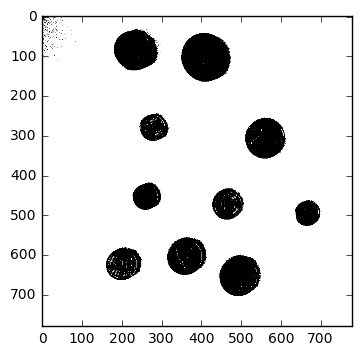

In [16]:
size = coins_gray.shape
print(size)
T = threshold_otsu(coins_gray)
bin_coins = np.zeros((size))

for i in range(0, size[0]):
    for j in range(0, size[1]):
        if(coins_gray[i][j] >= T):
            bin_coins[i][j] = 1
            # Better implementation
            # bin_image = coins_gray > T
plt.imshow(bin_coins, cmap='gray')


Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

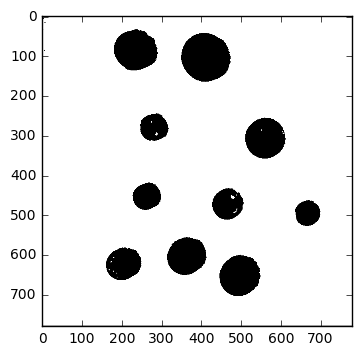

In [118]:
clean_coins = binary_closing(bin_coins)
clean_coins = binary_closing(clean_coins)
clean_coins = binary_closing(clean_coins)
clean_coins = binary_opening(clean_coins)
clean_coins = binary_opening(clean_coins)
clean_coins = binary_opening(clean_coins)

plt.imshow(clean_coins, cmap='gray')

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

/Users/mac/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


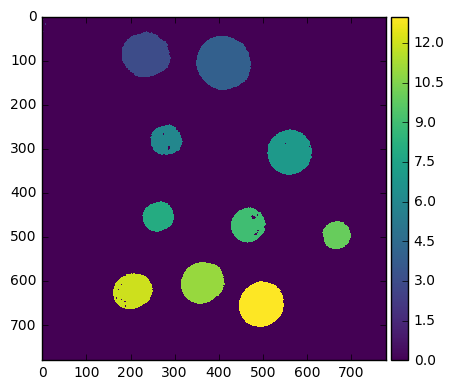

We have 13 labels.
In region 1 the radius is 1.2615662610100802
In region 2 the radius is 52.66038101298911
In region 3 the radius is 61.32821222853044
In region 4 the radius is 1.2615662610100802
In region 5 the radius is 34.62763840134553
In region 6 the radius is 50.66724022553697
In region 7 the radius is 34.60924878857679
In region 8 the radius is 38.497413290657974
In region 9 the radius is 31.81048770733122
In region 10 the radius is 48.01912968302716
In region 11 the radius is 42.261528265992105


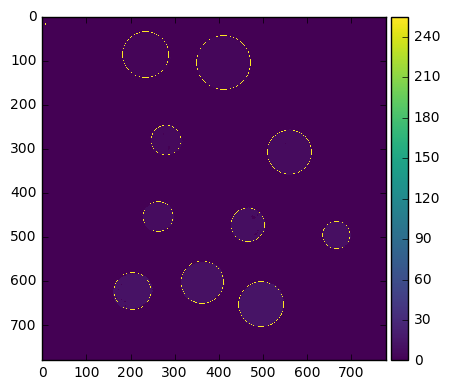

In [119]:
[coins_label, num] = label(clean_coins, return_num=True, background=True)
coins_props = regionprops(coins_label)
imshow(coins_label)
plt.show()

print("We have", num, "labels.")
for i in range(1, num-1):
    print("In region", i, "the radius is", coins_props[i].equivalent_diameter/2)

# Drawing circles
#circles_coins = np.zeros(num-1)
img_cir = np.zeros((size))
for i in range(1, num):
    c0 = int(coins_props[i].centroid[0])
    c1 = int(coins_props[i].centroid[1])
    r  = int(coins_props[i].equivalent_diameter/2)
    coord = circle_perimeter(c0, c1, r)
    coins_label[coord[0], coord[1]] = 255
    
imshow(coins_label)     
plt.show()

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

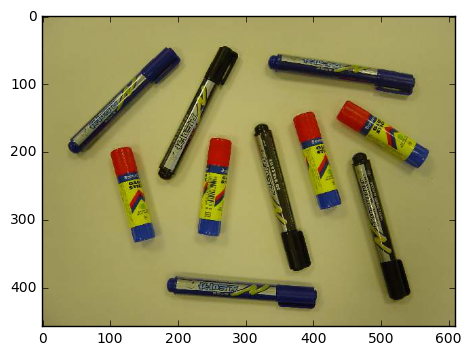

In [103]:
img = plt.imread('images/objets4.jpg')
markers = img_as_ubyte(img)
plt.imshow(markers)

In [123]:

print(size)
T = threshold_otsu(coins_gray)
bin_markers = np.zeros((size))
markers_gray = rgb2gray(markers)
size = markers_gray.shape



(458, 610)
